# Librería

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Data

In [3]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

# Primera Exploración

In [4]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Mini EDA

In [6]:
df = titanic.copy()

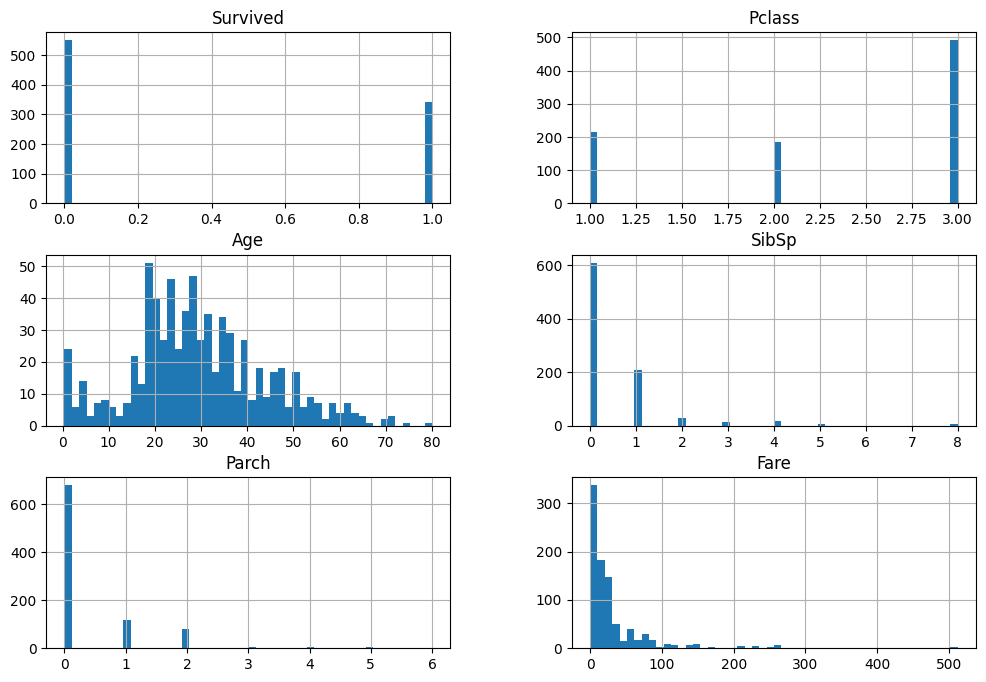

In [8]:
df.hist(bins=50, figsize=(12,8))
plt.show()

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

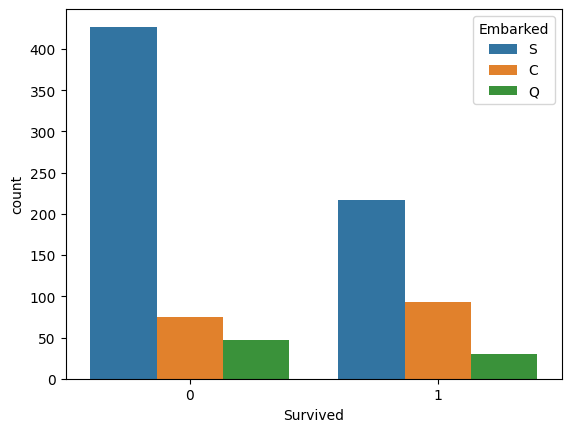

In [8]:
sns.countplot(x = 'Survived', data=df, hue='Embarked')

# Tratamiento de missing y valores atípicos

In [9]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [10]:
df = df.drop(columns='Cabin')

In [11]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


In [12]:
df.groupby(['Sex'])[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
# Código de Juan
'''
mean_male = df[df['Sex'] == 'male']['Age'].mean()
mean_female = df[df['Sex'] == 'female']['Age'].mean()

is_male = df['Sex'] == 'male'
is_female = df['Sex'] == 'female'

is_nan = df['Age'].isna()

df.loc[is_male & is_nan]['Age'] = mean_male
df.loc[is_female & is_nan]['Age'] = mean_female

'''

"\nmean_male = df[df['Sex'] == 'male']['Age'].mean()\nmean_female = df[df['Sex'] == 'female']['Age'].mean()\n\nis_male = df['Sex'] == 'male'\nis_female = df['Sex'] == 'female'\n\nis_nan = df['Age'].isna()\n\ndf.loc[is_male & is_nan]['Age'] = mean_male\ndf.loc[is_female & is_nan]['Age'] = mean_female\n\n"

In [14]:
for index, row in df.iterrows():
    if pd.isnull(row['Age']):
        if row['Sex'] == 'male':
            df.at[index, 'Age'] = 30 
        elif row['Sex'] == 'female':
            df.at[index, 'Age'] = 27

In [15]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [16]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
df['Embarked'].fillna('S', inplace=True)

In [18]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


In [20]:
import math

In [21]:
df['Age'] = df['Age'].round()

In [22]:
df['Age'].sort_values()

PassengerId
804     0.0
789     1.0
828     1.0
79      1.0
470     1.0
       ... 
673    70.0
97     71.0
494    71.0
852    74.0
631    80.0
Name: Age, Length: 891, dtype: float64

In [23]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,27.0,1,2,23.4500,S


# Feature Engineer

# División de Datos

In [71]:
X = df.drop(columns='Survived')
y = df['Survived']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Escalado + Dummies

- Name: no usar
- Sex: OHE
- Ticket: No usar
- Embarked: LabelEncoder

In [73]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe.fit(X_train[['Sex']])

transformed_X_train = ohe.transform(X_train[['Sex']])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['Sex']), index=X_train.index)
X_train_ohe = pd.concat([X_train, transformed_df], axis=1).drop(columns='Sex')

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
X_train_ohe

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,
152,1,22.0,1,0,66.6000,S,1.0,0.0
754,3,23.0,0,0,7.8958,S,0.0,1.0
747,3,16.0,1,1,20.2500,S,0.0,1.0
685,2,60.0,1,1,39.0000,S,0.0,1.0
888,1,19.0,0,0,30.0000,S,1.0,0.0
...,...,...,...,...,...,...,...,...
32,1,27.0,1,0,146.5208,C,1.0,0.0
489,3,30.0,0,0,8.0500,S,0.0,1.0
41,3,40.0,1,0,9.4750,S,1.0,0.0


In [75]:
le = LabelEncoder()
X_train_ohe['Embarked'] = le.fit_transform(X_train_ohe['Embarked'])

In [76]:
X_train_ohe

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,
152,1,22.0,1,0,66.6000,2,1.0,0.0
754,3,23.0,0,0,7.8958,2,0.0,1.0
747,3,16.0,1,1,20.2500,2,0.0,1.0
685,2,60.0,1,1,39.0000,2,0.0,1.0
888,1,19.0,0,0,30.0000,2,1.0,0.0
...,...,...,...,...,...,...,...,...
32,1,27.0,1,0,146.5208,0,1.0,0.0
489,3,30.0,0,0,8.0500,2,0.0,1.0
41,3,40.0,1,0,9.4750,2,1.0,0.0


In [77]:
X_train_ohe['Accompanied'] = X_train_ohe['SibSp'] + X_train_ohe['Parch']

In [79]:
X_train_ohe['Accompanied'] = np.where(X_train_ohe['Accompanied'] >= 1, 1, 0)


In [80]:
X_train_ohe

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Accompanied
PassengerId,,,,,,,,,
152,1,22.0,1,0,66.6000,2,1.0,0.0,1
754,3,23.0,0,0,7.8958,2,0.0,1.0,0
747,3,16.0,1,1,20.2500,2,0.0,1.0,1
685,2,60.0,1,1,39.0000,2,0.0,1.0,1
888,1,19.0,0,0,30.0000,2,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...
32,1,27.0,1,0,146.5208,0,1.0,0.0,1
489,3,30.0,0,0,8.0500,2,0.0,1.0,0
41,3,40.0,1,0,9.4750,2,1.0,0.0,1


In [81]:
X_train_ohe['Fare'] = np.log(X_train_ohe['Fare']+1)

In [82]:
X_train_ohe

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Accompanied
PassengerId,,,,,,,,,
152,1,22.0,1,0,4.213608,2,1.0,0.0,1
754,3,23.0,0,0,2.185579,2,0.0,1.0,0
747,3,16.0,1,1,3.056357,2,0.0,1.0,1
685,2,60.0,1,1,3.688879,2,0.0,1.0,1
888,1,19.0,0,0,3.433987,2,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...
32,1,27.0,1,0,4.993969,0,1.0,0.0,1
489,3,30.0,0,0,2.202765,2,0.0,1.0,0
41,3,40.0,1,0,2.348991,2,1.0,0.0,1


# Cross-Validation + Base-Lines

In [ ]:
modelos = {
    'LogisticRegression': LogisticRegression(),
    'DecissionTree': DecissionTree(),
    'RandmonForestClasifier': RandomForestClassifier(),

}

In [ ]:
VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

# Entrenar

# Predicción

# Validación del modelo